# The Sparks Foundation


 
### **GRIP July 2022**

### **Data Science and Business Anlytics**
 
### **Task 1 : Prediction using Supervised ML**
 
### **To Determine : Predicted Score if student Study for 9.25 hrs**

### **Data can be found at http://bit.ly/w-data**

## Name : Rani Rathore

# 1. Importing Libraries

In [156]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO


# 2. Gathering Data

In [157]:

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
response=requests.get(url)
data=StringIO(response.text)
df=pd.read_csv(data)
df  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 3. Data Preprocessing 

In [158]:
 df.shape  # we have 25 rows and 2 columns

(25, 2)

In [159]:
 df.sample(4) 

,Hours,Scores
18,6.1,67
10,7.7,85
1,5.1,47
5,1.5,20


In [160]:
 df.info()  # Hours is our independent variable and Scores is dependent variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [161]:
 df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [162]:
 df.isnull().sum()   # there is missing value

Hours     0
Scores    0
dtype: int64

C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

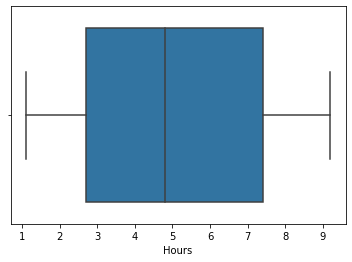

In [163]:
 sns.boxplot(df['Hours'])   #there is no outlier in data 

# 4.  Exploratory Data Analysis

Text(0, 0.5, 'Scores Obtained ')

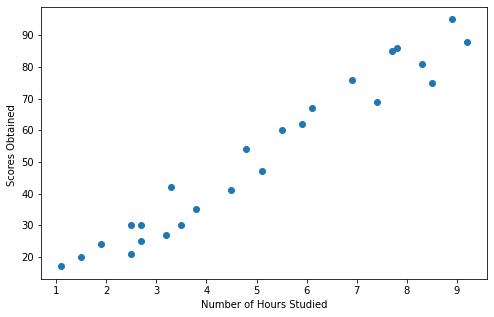

In [165]:
# multivariant data analysis

fig = plt.figure(figsize=(8,5))

plt.scatter(df['Hours'],df['Scores'])

plt.xlabel("Number of Hours Studied")

plt.ylabel("Scores Obtained ")


#  5. Model Training Evaluation and Selection

### * Data Preparation

In [166]:
X = df.iloc[:,0].values.reshape(-1,1)

Y = df.iloc[:,1].values.reshape(-1,1)

In [167]:
# splitting training and testing data into 80:20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [148]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

### * Training the Model

In [149]:
# This is simple Linear Regression Problem

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

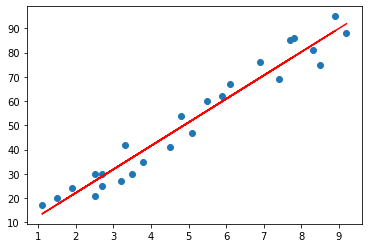

In [150]:
# best fit line

import matplotlib.pyplot as plt
plt.scatter(df['Hours'],df['Scores'])
plt.plot(X_train,lr.predict(X_train),color='red')


In [151]:

y_pred = lr.predict(X_test)
y_pred
 

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

# 6.  Accuracy of Linear Model

In [152]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",rmse)

Root Mean Squared Error :  4.352380006653288


# 7.  Making Prediction

In [155]:
hours = 9.25
print(f"No of Hours Studied ={hours}")
print(f"Predicted Score if Student Study for {hours} hrs =", lr.predict([[hours]]))

No of Hours Studied =9.25
Predicted Score if Student Study for 9.25 hrs = [[92.38611528]]
